In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
!pip install tflearn
import tflearn
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow import keras
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.models import Model, Sequential


     |████████████████████████████████| 107 kB 5.3 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=a3f5d32d7e631e71a241a99fb8644ec58a93f2c0e939c1dad39e81dbbd37775a
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn
Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [ ]:

from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation


In [ ]:
def get_proper_images(raw):
    raw_float = np.array(raw, dtype=float) 
    images = raw_float.reshape([-1, 3, 32, 32])
    images = images.transpose([0, 2, 3, 1])
    return images

def onehot_labels(labels):
    return np.eye(100)[labels]

def unpickle(file):
    import Pickle.Pickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.shape

(50000, 32, 32, 3)

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cnn = models.Sequential([
                         
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),     #32 = the filter can detect 32 different edges in image.
    layers.MaxPooling2D((2, 2)), 

    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')
    
])

cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = cnn.fit(x_train,y_train, epochs=30, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - ETA: 0s - loss: 3.7591 - acc: 0.1246

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 30s 590us/sample - loss: 3.7591 - acc: 0.1246 - val_loss: 3.1760 - val_acc: 0.2290
Epoch 2/30
50000/50000 [==============================] - 15s 305us/sample - loss: 3.0428 - acc: 0.2499 - val_loss: 2.8099 - val_acc: 0.2960
Epoch 3/30
50000/50000 [==============================] - 15s 305us/sample - loss: 2.7330 - acc: 0.3114 - val_loss: 2.5909 - val_acc: 0.3476
Epoch 4/30
50000/50000 [==============================] - 15s 306us/sample - loss: 2.5297 - acc: 0.3520 - val_loss: 2.4150 - val_acc: 0.3778
Epoch 5/30
50000/50000 [==============================] - 15s 306us/sample - loss: 2.3744 - acc: 0.3837 - val_loss: 2.3594 - val_acc: 0.3953
Epoch 6/30
50000/50000 [==============================] - 15s 306us/sample - loss: 2.2519 - acc: 0.4106 - val_loss: 2.2814 - val_acc: 0.4059
Epoch 7/30
50000/50000 [==============================] - 15s 306us/sample - loss: 2.1514 - acc: 0.4322 - val_loss: 2.2982 - val_acc: 0.4024
Epoch 8/30
50000/50000 [

In [ ]:
results = cnn.evaluate(x_test,y_test)
print("test loss, test acc:",results)

test loss, test acc: [2.2742208782196043, 0.4407]


In [ ]:
results2=cnn.evaluate(x_train,y_train)
print('training loss, training acc:',results2)

training loss, training acc: [0.6713912676620484, 0.82816]


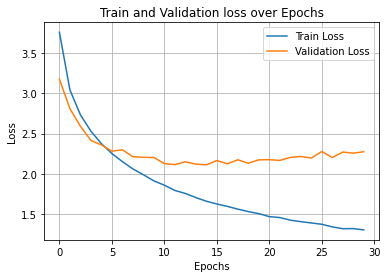

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation loss over Epochs')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

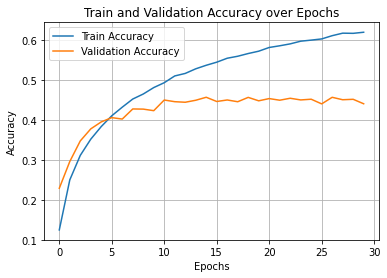

In [ ]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

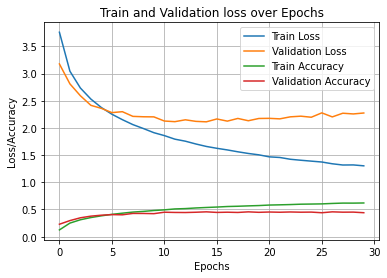

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Train and Validation loss over Epochs')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.grid()
plt.show()